In [1]:
import pandas as pd

file_path = "gold_historical_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Close,High,Low,Open,Volume
0,2019-01-02,1281.0,1286.0,1277.6,1286.0,149
1,2019-01-03,1291.8,1292.0,1286.7,1286.8,10
2,2019-01-04,1282.7,1294.2,1275.3,1294.2,34
3,2019-01-07,1286.8,1286.8,1286.6,1286.8,2
4,2019-01-08,1283.2,1283.2,1278.2,1280.5,54


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df['Return'] = df['Close'].pct_change()
df['Open_Close_Change'] = (df['Close'] - df['Open']) / df['Open']
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df = df.dropna().reset_index(drop=True)
train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']
features_time = ['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']
X_train_time = train_df[features_time]
y_train_time = train_df['Target']
X_test_time = test_df[features_time]
y_test_time = test_df['Target']

scaler = StandardScaler()
X_train_time_scaled = scaler.fit_transform(X_train_time)
X_test_time_scaled = scaler.transform(X_test_time)

model_time = LogisticRegression()
model_time.fit(X_train_time_scaled, y_train_time)

y_pred_time = model_time.predict(X_test_time_scaled)
accuracy_time = accuracy_score(y_test_time, y_pred_time)
report_time = classification_report(y_test_time, y_pred_time)

conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)
accuracy_time, report_time, conf_matrix_time


(0.41935483870967744,
 '              precision    recall  f1-score   support\n\n           0       0.40      0.81      0.54       117\n           1       0.50      0.14      0.21       162\n\n    accuracy                           0.42       279\n   macro avg       0.45      0.47      0.38       279\nweighted avg       0.46      0.42      0.35       279\n',
 array([[ 95,  22],
        [140,  22]]))

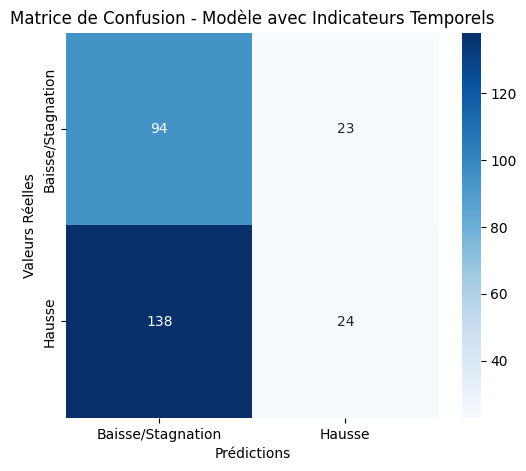

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_time, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle avec Indicateurs Temporels")
plt.show()


10:35:35 - cmdstanpy - INFO - Chain [1] start processing
10:35:36 - cmdstanpy - INFO - Chain [1] done processing


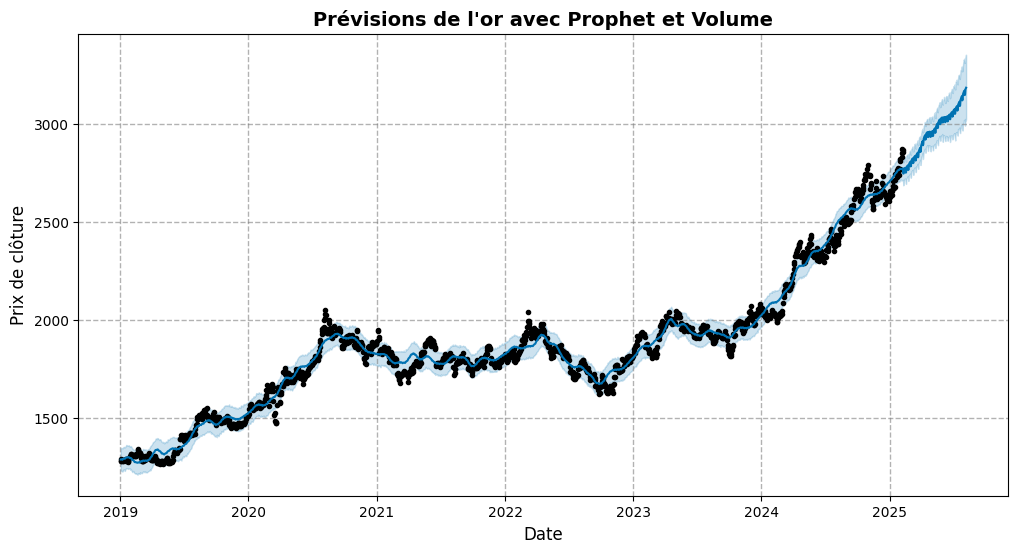

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,1290.548298,1232.340325,1348.146721
1,2019-01-03,1291.136792,1232.792209,1348.747718
2,2019-01-04,1291.193143,1234.163653,1349.811872
3,2019-01-07,1289.219869,1228.384598,1347.417289
4,2019-01-08,1291.933337,1232.845825,1349.402322
5,2019-01-09,1293.244007,1233.421686,1348.715343
6,2019-01-10,1294.271174,1239.485001,1354.291796
7,2019-01-11,1294.771076,1241.170555,1354.897211
8,2019-01-14,1293.992685,1232.155230,1352.287582
9,2019-01-15,1297.002108,1238.227698,1355.361945


In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("gold_historical_data_cleaned.csv")
df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  

model.fit(df_prophet)

future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions de l'or avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")


Mean Absolute Error (MAE) : 35.30
Root Mean Squared Error (RMSE) : 45.32


10:42:40 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing


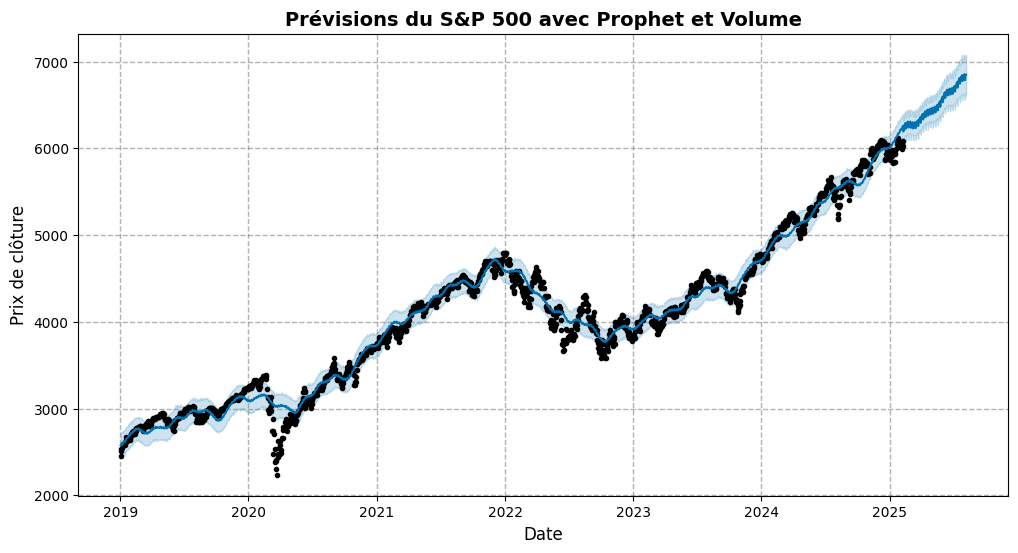

  0%|          | 0/8 [00:00<?, ?it/s]

10:42:42 - cmdstanpy - INFO - Chain [1] start processing
10:42:42 - cmdstanpy - INFO - Chain [1] done processing
10:42:42 - cmdstanpy - INFO - Chain [1] start processing
10:42:42 - cmdstanpy - INFO - Chain [1] done processing
10:42:43 - cmdstanpy - INFO - Chain [1] start processing
10:42:43 - cmdstanpy - INFO - Chain [1] done processing
10:42:43 - cmdstanpy - INFO - Chain [1] start processing
10:42:44 - cmdstanpy - INFO - Chain [1] done processing
10:42:44 - cmdstanpy - INFO - Chain [1] start processing
10:42:44 - cmdstanpy - INFO - Chain [1] done processing
10:42:44 - cmdstanpy - INFO - Chain [1] start processing
10:42:45 - cmdstanpy - INFO - Chain [1] done processing
10:42:45 - cmdstanpy - INFO - Chain [1] start processing
10:42:46 - cmdstanpy - INFO - Chain [1] done processing
10:42:46 - cmdstanpy - INFO - Chain [1] start processing
10:42:47 - cmdstanpy - INFO - Chain [1] done processing


  horizon           mse        rmse         mae      mape     mdape
0 18 days  24079.216841  155.174794  112.489393  0.026228  0.016706
1 19 days  26348.839531  162.323256  114.528795  0.026847  0.016024
2 20 days  27456.268290  165.699331  117.118560  0.027402  0.016024
3 21 days  28620.700712  169.176537  120.835800  0.028175  0.015825
4 22 days  32119.368807  179.218774  128.683705  0.029962  0.016706


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,2574.854053,2431.822643,2700.371974
1,2019-01-03,2578.181375,2441.112044,2716.209874
2,2019-01-04,2589.910744,2447.171573,2733.226108
3,2019-01-07,2583.515195,2440.507470,2720.658015
4,2019-01-08,2591.686095,2444.974833,2731.706794
5,2019-01-09,2597.438018,2462.149764,2738.017413
6,2019-01-10,2603.083232,2464.643805,2736.874775
7,2019-01-11,2616.963832,2483.869901,2747.680374
8,2019-01-14,2615.829579,2468.487306,2759.952523
9,2019-01-15,2625.317646,2482.063367,2766.899512


In [23]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

df = pd.read_csv("sp500_historical_data_cleaned.csv")

df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  
model.fit(df_prophet)
future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions du S&P 500 avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='180 days')
metrics = performance_metrics(cv_results)
print(metrics[['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape']].head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)
